In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from shapely.geometry import Point, Polygon
from colour import Color

In [8]:
# Read in prepped csv files
lis = pd.read_csv('./data/prepped/lis.csv')
cal = pd.read_csv('./data/prepped/cal.csv')

# Read in raw listing for mapping
lis_raw = pd.read_csv('./data/raw/listings.csv')

In [3]:
# Group all listings by date of listing
cal_by_datetime = cal.groupby('datetime', as_index = False).sum()
cal_by_datetime['datetime'] = pd.to_datetime(cal_by_datetime['datetime'])

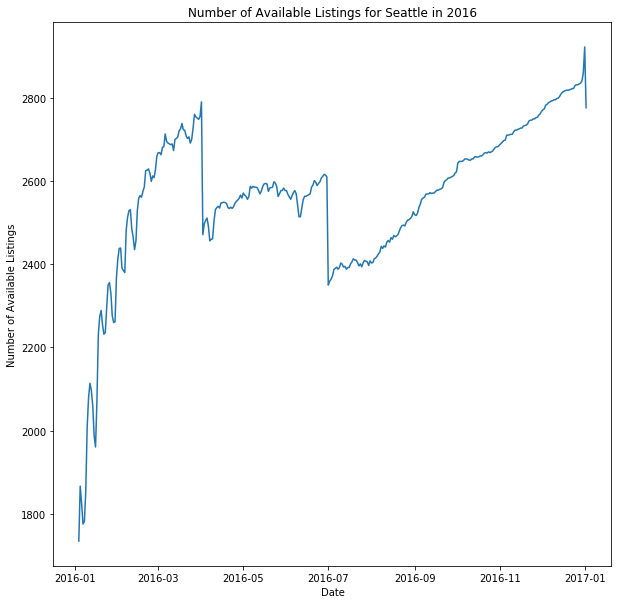

In [4]:
# Graph of date vs. number of available listings
fig_num_listings_by_date = plt.figure(figsize = (10, 10))
plt.plot(cal_by_datetime.datetime.dt.to_pydatetime(), cal_by_datetime['is_available'])
plt.xlabel('Date')
plt.ylabel('Number of Available Listings')
plt.title('Number of Available Listings for Seattle in 2016')
plt.show()

In [5]:
# Create geometry column for listings
geometry = [Point(xy) for xy in zip(lis_raw['longitude'], lis_raw['latitude'])]
crs = {'init': 'epsg:4326'}
lis_raw = gpd.GeoDataFrame(lis, crs = crs, geometry = geometry)

In [6]:
# From https://data.seattle.gov/Land-Base/2010-US-Census-Blocks/46cb-j9zb
# Create background map of Seattle
shp = gpd.GeoDataFrame.from_file('data/raw/2010_US_Census_Blocks.shp')

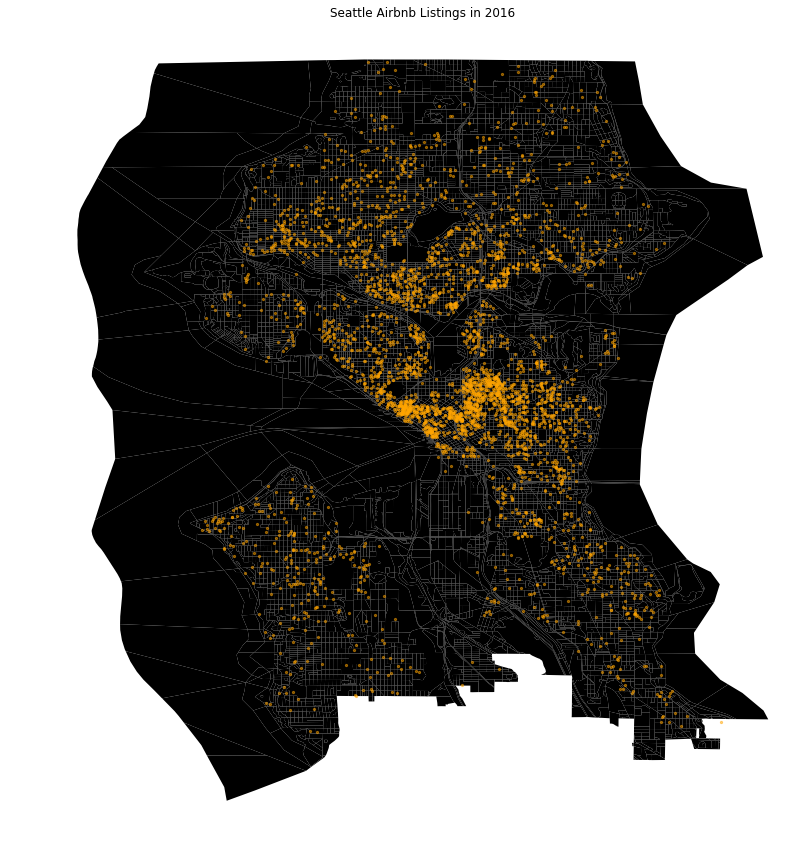

In [7]:
# Map of Seattle Airbnb Listings
fig_map_seattle_listings, ax = plt.subplots(figsize = (15, 15))
base = shp.plot(ax = ax, color = 'black')
lis_raw.plot(ax = base,
         marker = 'o',
         color = 'orange',
         markersize = 5,
         alpha = 0.5)
_ = ax.axis('off')
plt.title('Seattle Airbnb Listings in 2016')
plt.show()

In [8]:
# Generate color gradient for price map
violet = Color('violet')
violet_to_indigo = list(violet.range_to(Color('indigo'), 6))

violet_to_indigo

[<Color violet>,
 <Color #e054ed>,
 <Color #cc23ee>,
 <Color #a30bd6>,
 <Color #7404ad>,
 <Color indigo>]

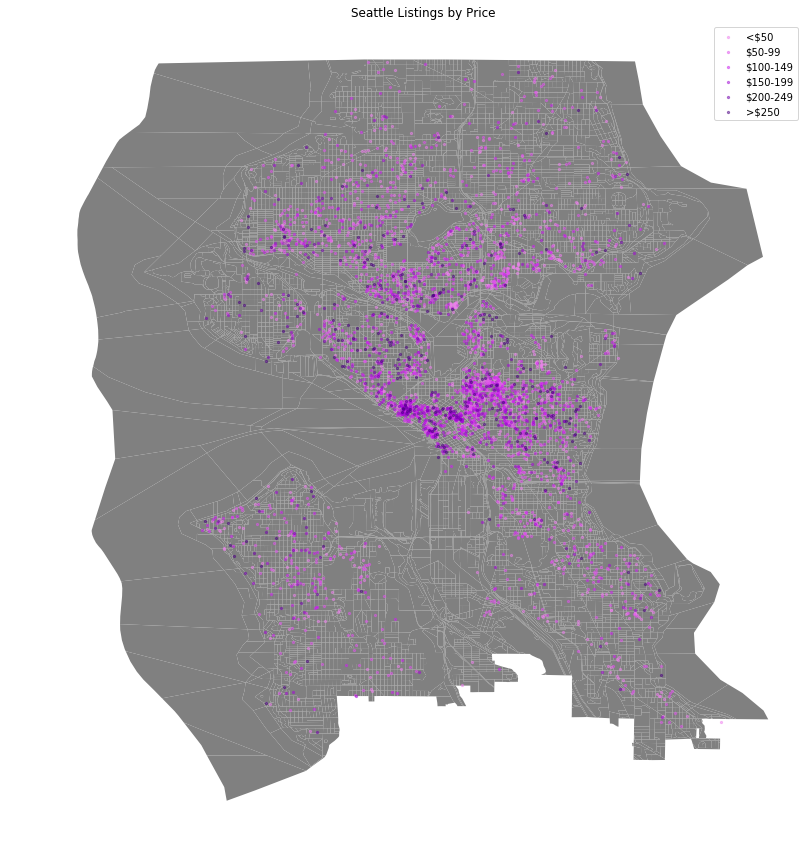

In [9]:
# Map of Seattle Airbnb listings by price
fig_map_seattle_listings_price, ax = plt.subplots(figsize = (15, 15))
base = shp.plot(ax = ax, color = 'grey')
lis_raw[lis_raw.price_float <= 50].plot(ax = base,
                              marker = 'o',
                              color = 'violet',
                              markersize = 5,
                              alpha = 0.5,
                              label = '<$50')
lis_raw[(lis_raw.price_float > 50) & (lis_raw.price_float < 100)].plot(ax = base,
                                                       marker = 'o',
                                                       color = '#e054ed',
                                                       markersize = 5,
                                                       alpha = 0.5,
                                                       label = '$50-99')
lis_raw[(lis_raw.price_float >= 100) & (lis_raw.price_float < 150)].plot(ax = base,
                                                         marker = 'o',
                                                         color = '#cc23ee',
                                                         markersize = 5,
                                                         alpha = 0.5,
                                                         label = '$100-149')
lis_raw[(lis_raw.price_float >= 150) & (lis_raw.price_float < 200)].plot(ax = base,
                                                         marker = 'o',
                                                         color = '#a30bd6',
                                                         markersize = 5,
                                                         alpha = 0.5,
                                                         label = '$150-199')
lis_raw[(lis_raw.price_float >= 200) & (lis_raw.price_float < 250)].plot(ax = base,
                                                         marker = 'o',
                                                         color = '#7404ad',
                                                         markersize = 5,
                                                         alpha = 0.5,
                                                         label = '$200-249')
lis_raw[(lis_raw.price_float >= 250)].plot(ax = base,
                                 marker = 'o',
                                 color = 'indigo',
                                 markersize = 5,
                                 alpha = 0.5,
                                 label = '>$250')
_ = ax.axis('off')
plt.title('Seattle Listings by Price')
plt.legend()
plt.show()

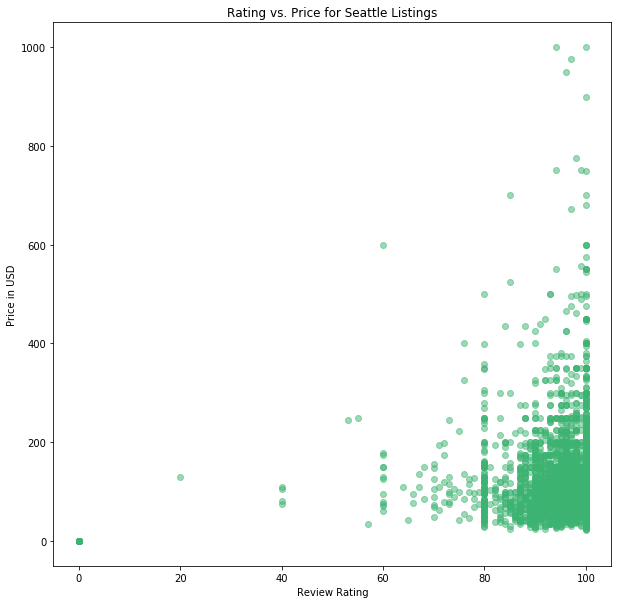

In [10]:
# Graph of review rating vs. price
fig_rating_vs_price = plt.figure(figsize = (10, 10))
plt.scatter(lis.review_scores_rating, lis.price_float, alpha = 0.5, color = 'mediumseagreen')
plt.xlabel('Review Rating')
plt.ylabel('Price in USD')
plt.title('Rating vs. Price for Seattle Listings')
plt.show()

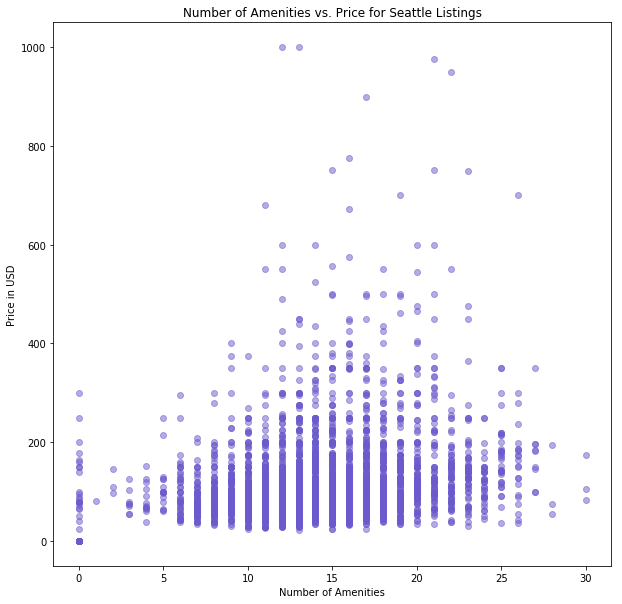

In [11]:
# Graph of number of amenities vs. price
fig_num_amenities_vs_price = plt.figure(figsize = (10, 10))
plt.scatter(lis.amenities_count, lis.price_float, alpha = 0.5, color = 'slateblue')
plt.xlabel('Number of Amenities')
plt.ylabel('Price in USD')
plt.title('Number of Amenities vs. Price for Seattle Listings')
plt.show()

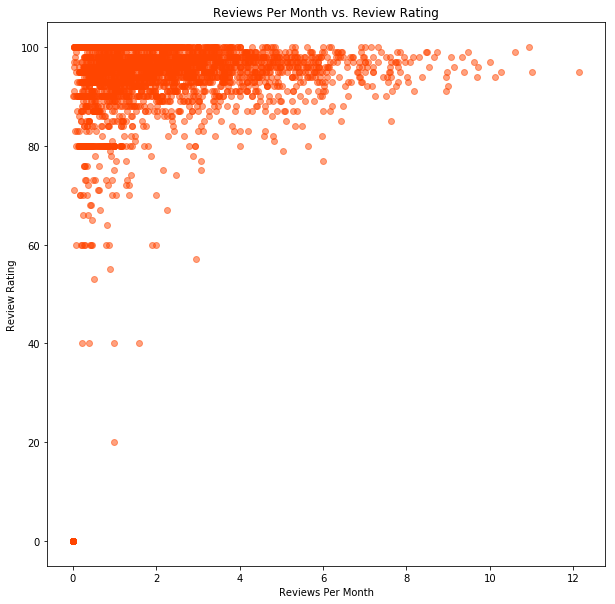

In [12]:
# Graph of reviews per month vs. review rating
fig_reviews_per_month_vs_price = plt.figure(figsize = (10, 10))
plt.scatter(lis.reviews_per_month, lis.review_scores_rating, alpha = 0.5, color = 'orangered')
plt.xlabel('Reviews Per Month')
plt.ylabel('Review Rating')
plt.title('Reviews Per Month vs. Review Rating')
plt.show()

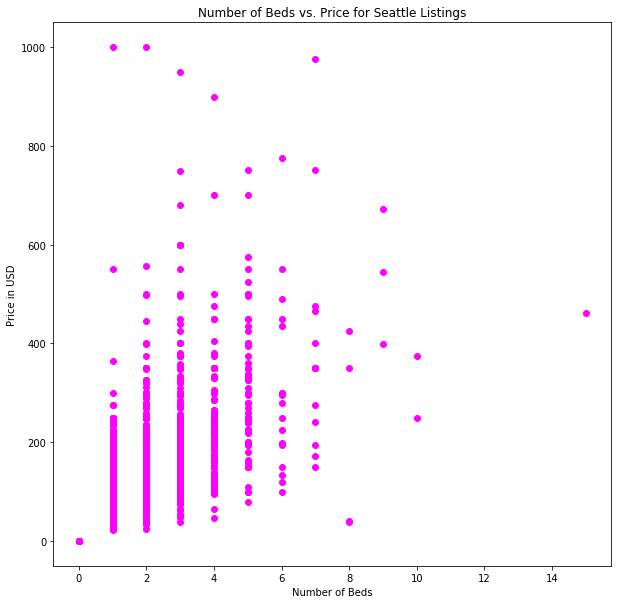

In [13]:
# Graph of number of beds vs. price
fig_num_beds_vs_price = plt.figure(figsize = (10, 10))
plt.scatter(lis.beds, lis.price_float, color = 'fuchsia')
plt.xlabel('Number of Beds')
plt.ylabel('Price in USD')
plt.title('Number of Beds vs. Price for Seattle Listings')
plt.show()

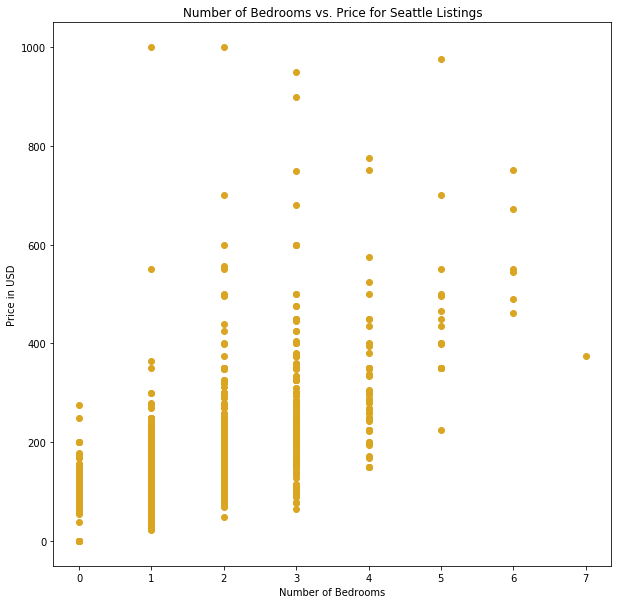

In [14]:
# Graph of number of bedrooms vs. price
fig_num_bedrooms_vs_price = plt.figure(figsize = (10, 10))
plt.scatter(lis.bedrooms, lis.price_float, color = 'goldenrod')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in USD')
plt.title('Number of Bedrooms vs. Price for Seattle Listings')
plt.show()

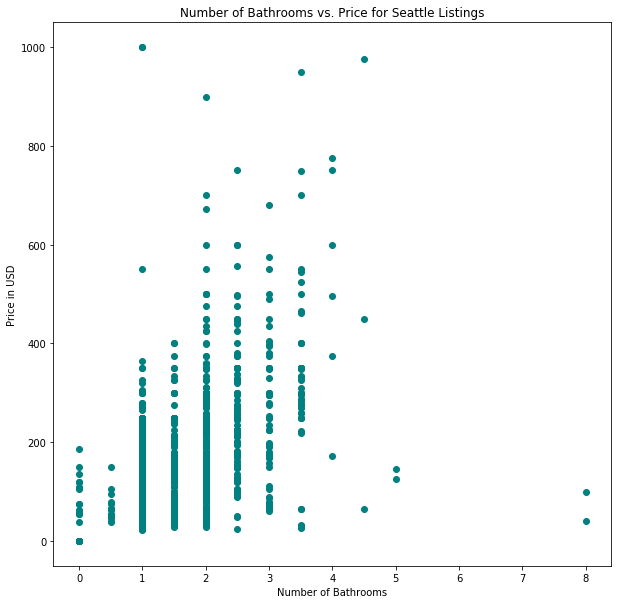

In [15]:
# Graph of number of bathrooms vs. price
fig_num_bathrooms_vs_price = plt.figure(figsize = (10, 10))
plt.scatter(lis.bathrooms, lis.price_float, color = 'teal')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price in USD')
plt.title('Number of Bathrooms vs. Price for Seattle Listings')
plt.show()

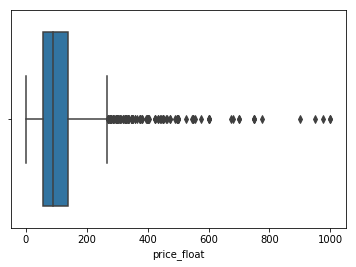

In [9]:
sns.boxplot(x=lis.price_float)